# 9장. 변수 추가

## 이진값 변수 추가(Adding binary regressors)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

df = pd.read_csv('/content/drive/MyDrive/Book7/data/divvy_daily.csv')

In [ ]:
print(df.groupby('weather')['weather'].count())

weather
clear             41
cloudy          1346
not clear          2
rain or snow      69
Name: weather, dtype: int64


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y', 'temp', 'weather']
df = pd.get_dummies(df, columns=['weather'], prefix='', prefix_sep='')

In [ ]:
df.head()

,ds,y,temp,clear,cloudy,not clear,rain or snow
0,2014-01-01,95,19.483158,False,False,False,True
1,2014-01-02,111,16.833333,False,False,False,True
2,2014-01-03,6,-5.633333,True,False,False,False
3,2014-01-04,181,30.007735,False,False,False,True
4,2014-01-05,32,16.756250,False,False,False,True


In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4)
model.add_regressor(name='clear',
                    prior_scale=10,
                    standardize='auto',
                    mode='multiplicative')
model.add_regressor('not clear')
model.add_regressor('rain or snow')

In [ ]:
from datetime import timedelta

# 학습용 데이터프레임 train에서 마지막 2 주 제거
train = df[df['ds'] < df['ds'].max() - timedelta(weeks=2)]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzk2dh74h/gtqfv8z8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzk2dh74h/z65tn8en.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38154', 'data', 'file=/tmp/tmpzk2dh74h/gtqfv8z8.json', 'init=/tmp/tmpzk2dh74h/z65tn8en.json', 'output', 'file=/tmp/tmpzk2dh74h/prophet_model5p5c25xi/prophet_model-20250709123620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:36:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


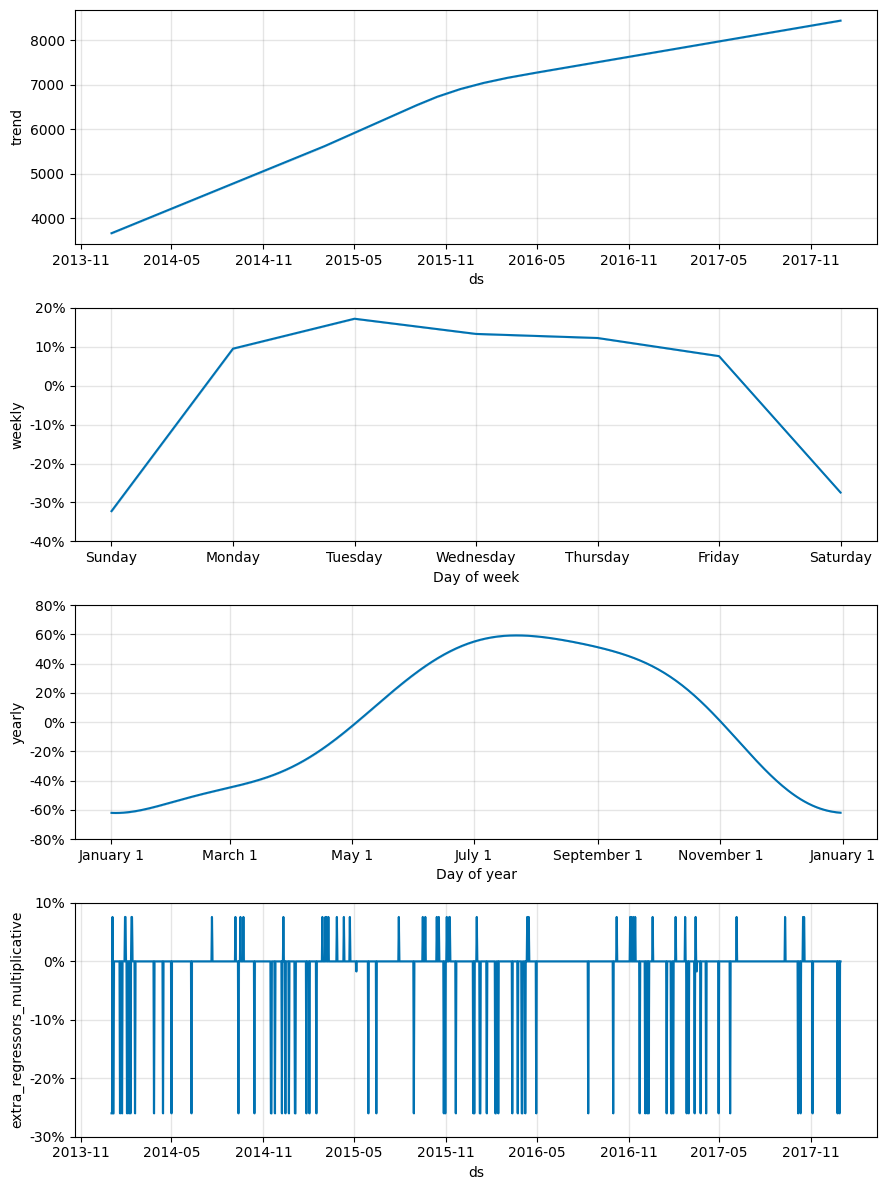

In [ ]:
model.fit(train)

future = model.make_future_dataframe(periods=14)
future['clear'] = df['clear']
future['not clear'] = df['not clear']
future['rain or snow'] = df['rain or snow']
forecast = model.predict(future)

fig2 = model.plot_components(forecast)
plt.show()

## 연속형 변수 추가(Adding continuous regressors)

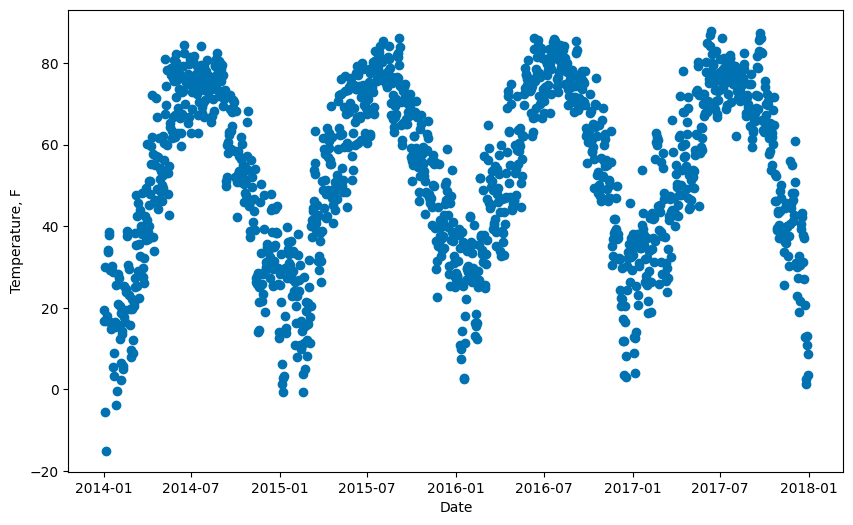

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pd.to_datetime(df['ds']), df['temp'], c='#0072B2')
plt.xlabel('Date')
plt.ylabel('Temperature, F')
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzk2dh74h/9ki_gra4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzk2dh74h/oh1atoqk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69189', 'data', 'file=/tmp/tmpzk2dh74h/9ki_gra4.json', 'init=/tmp/tmpzk2dh74h/oh1atoqk.json', 'output', 'file=/tmp/tmpzk2dh74h/prophet_modelxjo539d_/prophet_model-20250709123631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:36:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


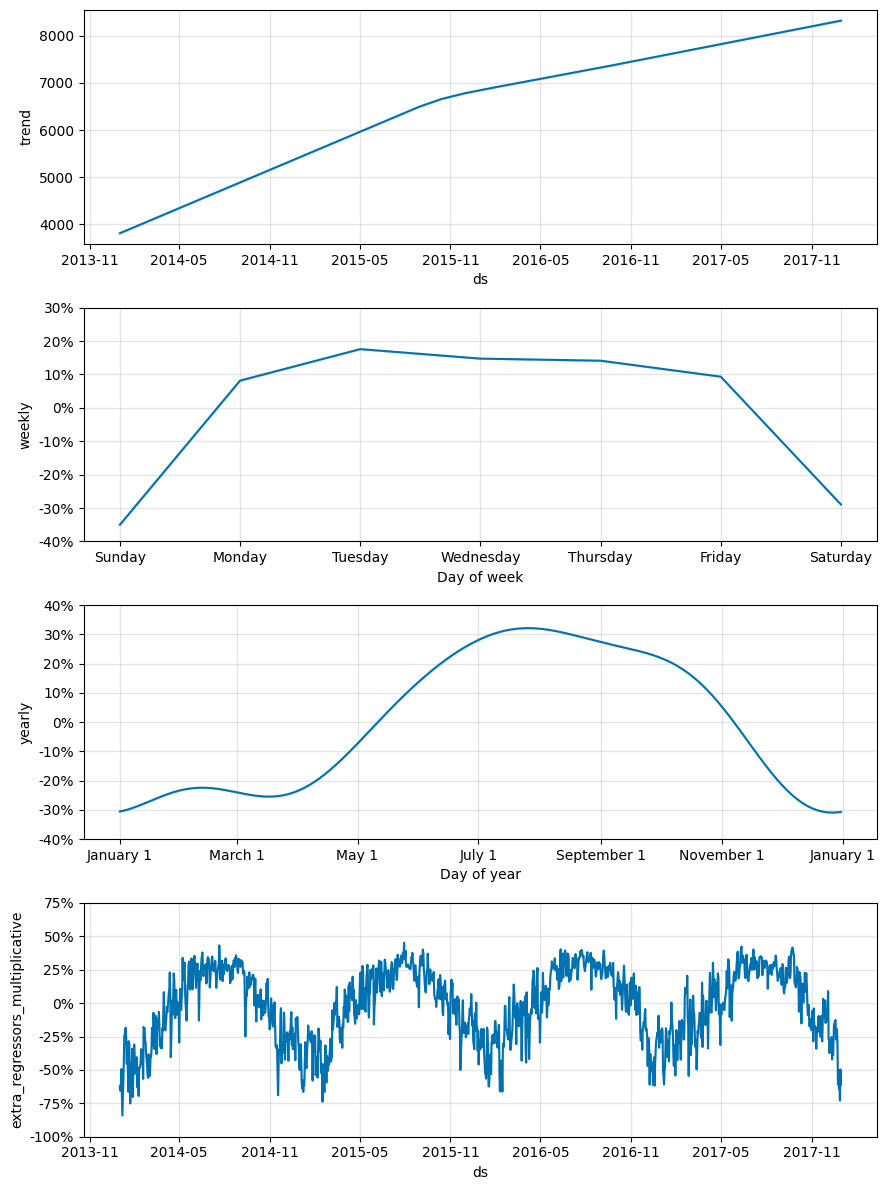

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4)
model.add_regressor('temp')
model.add_regressor('clear')
model.add_regressor('not clear')
model.add_regressor('rain or snow')

model.fit(train)

future = model.make_future_dataframe(periods=14)
future['temp'] = df['temp']
future['clear'] = df['clear']
future['not clear'] = df['not clear']
future['rain or snow'] = df['rain or snow']
forecast = model.predict(future)

fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
from prophet.utilities import regressor_coefficients

In [ ]:
regressor_coefficients(model)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,temp,multiplicative,53.423706,0.012285,0.012285,0.012285
1,clear,multiplicative,0.000000,0.110607,0.110607,0.110607
2,not clear,multiplicative,0.000000,-0.033506,-0.033506,-0.033506
3,rain or snow,multiplicative,0.000000,-0.205482,-0.205482,-0.205482


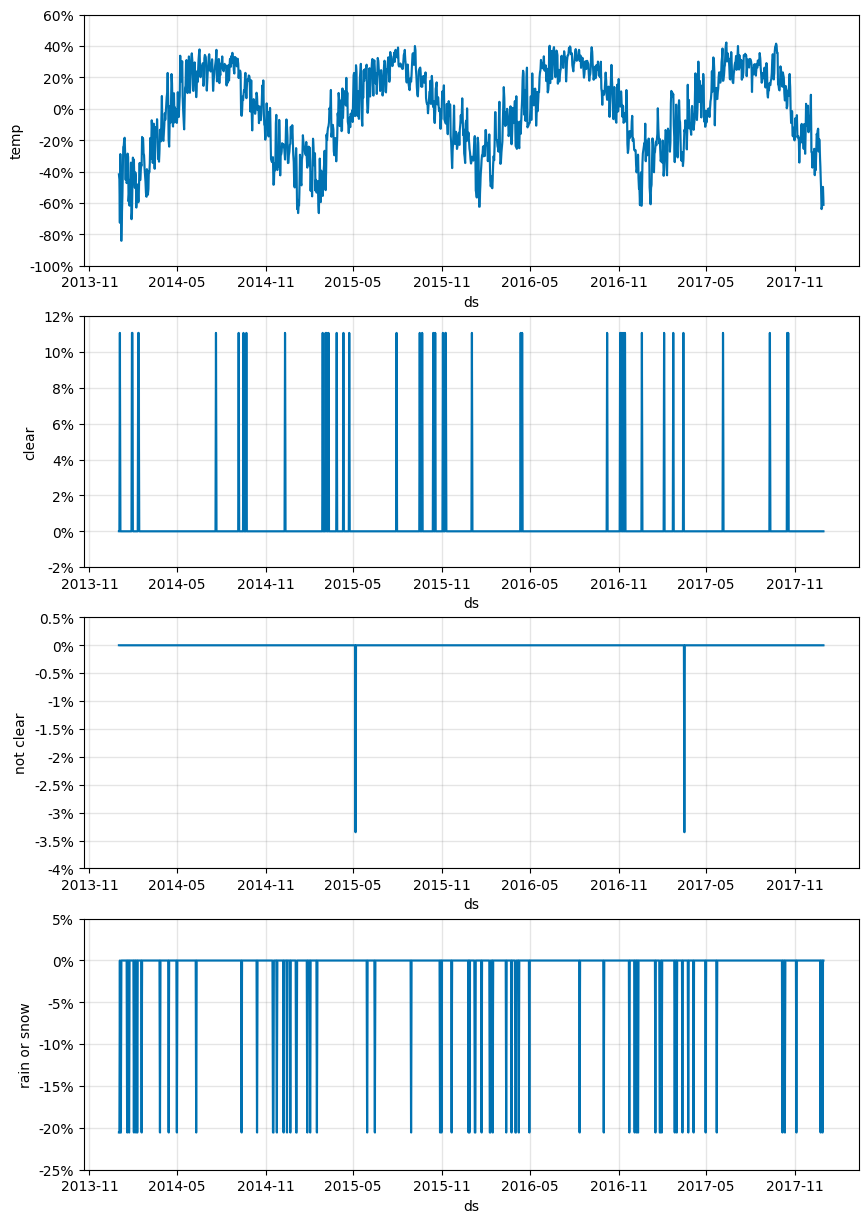

In [ ]:
from prophet.plot import plot_forecast_component

fig, axes = plt.subplots(len(regressor_coefficients(model)),
                         figsize=(10, 15))
for i, regressor in enumerate(
    regressor_coefficients(model)['regressor']):
    plot_forecast_component(model,
                            forecast,
                            regressor,
                            axes[i])
plt.show()